# Introduction

Color quantization is a process of reducing the number of distinct colors used in an image while preserving its overall appearance. This is done by clustering similar colors together and representing them with a single color value. In this lab, we will use K-Means clustering algorithm to perform color quantization on an image of the Summer Palace in China.

# Load and Display the Original Image

We will begin by loading and displaying the original image of the Summer Palace.

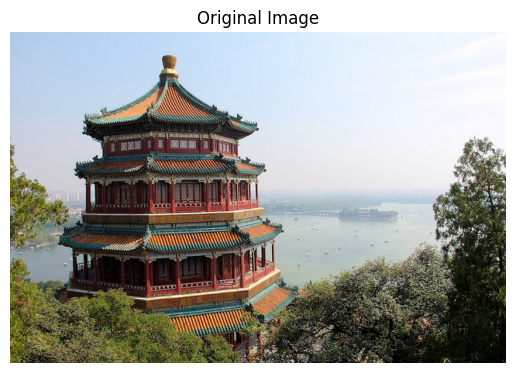

In [7]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Display the original image
plt.figure()
plt.axis("off")
plt.title("Original Image")
plt.imshow(china)
plt.show()

# Convert Image to Floats and Reshape

We will convert the image to floats and reshape it into a 2D numpy array so that it can be processed by the K-Means algorithm.

In [8]:
# Convert to floats instead of the default 8 bits integer coding.
china = np.array(china, dtype=np.float64) / 255

# Get the dimensions of the image
w, h, d = original_shape = tuple(china.shape)
assert d == 3

# Reshape the image into a 2D numpy array
image_array = np.reshape(china, (w * h, d))

# Fit the K-Means Model

We will fit the K-Means model on a small sub-sample of the image data, and use it to predict color indices on the full image.

In [9]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Fit the K-Means model on a small sub-sample of the data
print('Fitting model on a small sub-sample of the data')
t0 = time()
image_array_sample = shuffle(image_array, random_state=42, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, n_init='auto', random_state=42).fit(image_array_sample)
print(f'done in {time() - t0} seconds')

# Get labels for all points
print('Predicting color indices on the full image (k-means)')
t0 = time()
labels = kmeans.predict(image_array)
print(f'done in {time() - t0} seconds')

Fitting model on a small sub-sample of the data
done in 0.02938389778137207 seconds
Predicting color indices on the full image (k-means)
done in 0.007082939147949219 seconds


# Predict Color Indices Using Random Codebook

We will predict color indices on the full image using a random codebook.

In [11]:
# Get a random codebook
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)

# Predict color indices on the full image using the random codebook
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 0.018s.


# Recreate the Image

We will recreate the compressed image using the codebook and labels obtained from the K-Means model and the random codebook.

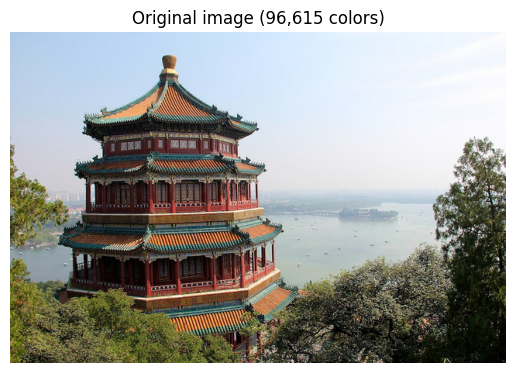

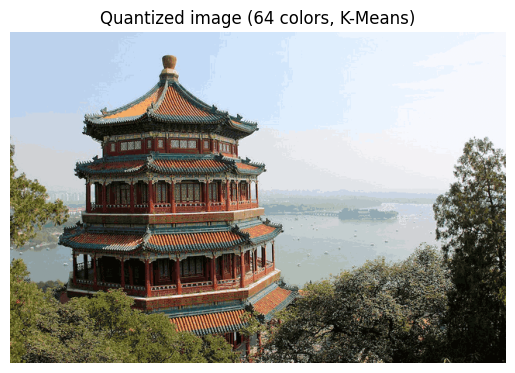

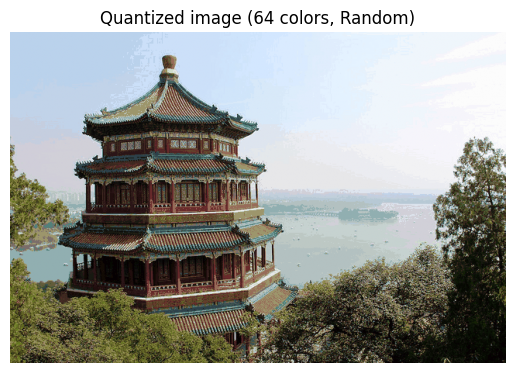

In [12]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

# Display the original image alongside the quantized images
plt.figure()
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure()
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure()
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))

plt.show()

# Summary

In this lab, we learned how to use the K-Means clustering algorithm to perform color quantization on an image. We loaded and displayed the original image, converted it to floats and reshaped it into a 2D numpy array. We fit the K-Means model on a sub-sample of the image data and used it to predict color indices on the full image. We also predicted color indices on the full image using a random codebook. Finally, we recreated the compressed image using the codebook and labels obtained from the K-Means model and the random codebook, and displayed the original image alongside the quantized images.